In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from IPython.display import display

# Adjust pandas display options for better readability
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_colwidth', None) # Do not truncate column contents

# Load the Excel file
df = pd.read_excel('NileULex_v0.27.xlsx', skiprows=10, names=['Term', 'Polarity', 'Egyptian', 'MSA'])

# Display the first few rows using IPython display
display(df.head())

,Term,Polarity,Egyptian,MSA
0,اتقي الله,compound_neg,0,1
1,اتقي شر,compound_neg,0,1
2,اتكسف علي دمك,compound_neg,1,0
3,اتكسفوا علي دمكم,compound_neg,1,0
4,اتمسح بينا الأرض,compound_neg,1,0


In [3]:
df.drop_duplicates(inplace=True)

In [4]:
df.dropna(inplace=True)

# stratified Random Sample

In [7]:
def stratified_random_sample(df, category_column, n_samples_per_category, seed=42):
    # Sample n_samples_per_category from each category
    return df.groupby(category_column).apply(lambda x: x.sample(n=n_samples_per_category, random_state=seed)).reset_index(drop=True)

# Example usage with 3 samples per 'Polarity' category
stratified_samples = stratified_random_sample(df, 'Polarity', n_samples_per_category=5)

# Display the stratified samples
display(stratified_samples.style.set_properties(**{'text-align': 'left'}).set_table_styles([{
    'selector': 'th',
    'props': [('text-align', 'left')]
}]))



,Term,Polarity,Egyptian,MSA
0,يلعن ابو,compound_neg,1,0
1,أي بطيخ و السلام,compound_neg,1,0
2,يا لهوي,compound_neg,1,0
3,كلام فاضي,compound_neg,1,0
4,تطلع عينو,compound_neg,1,0
5,اللي جاي احلي,compound_pos,1,0
6,خلق نبيل,compound_pos,0,1
7,ربنا يفتح عليه,compound_pos,1,0
8,الناس الجامده,compound_pos,1,0
9,مستواها زين,compound_pos,0,1


# Random Sample

In [8]:
# Adjust pandas display options for better readability
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_colwidth', None) # Do not truncate column contents

# Define a function to generate random samples with a seed for reproducibility
def generate_random_sample(df, n_samples=15, seed=42):
    return df.sample(n=n_samples, random_state=seed)
# Generate random samples
random_samples = generate_random_sample(df)

# Display the random samples with improved styling
display(random_samples.style.set_properties(**{'text-align': 'left', 'width': '200px'}).set_table_styles([{
    'selector': 'th',
    'props': [('text-align', 'left'), ('width', '200px')]
}]))

,Term,Polarity,Egyptian,MSA
5798,وضح,positive,0,1
1624,بوظ,negative,1,0
3431,محال,negative,1,0
2121,تمسخرك,negative,1,0
2687,شحات,negative,1,0
2331,خادع,negative,0,1
4196,هنشتم,negative,1,0
4277,يتحرق,negative,1,0
2716,شكي,negative,0,1
5159,خسرناك,positive,1,0


# Calculate the total number of rows in the dataset

In [9]:
# Calculate the total number of rows
total_rows = len(df)

# Count the occurrences of each type of polarity in the Polarity column
polarity_counts = df['Polarity'].value_counts()

# Generate descriptive statistics for numerical columns
descriptive_stats = df.describe()

# Display results with context and improved formatting
print(f"Total number of rows: {total_rows}\n")

print("Occurrences of each type of polarity:")
display(polarity_counts)

print("\nDescriptive statistics for numerical columns:")
display(descriptive_stats)


Total number of rows: 5941

Occurrences of each type of polarity:


negative        3692
positive        1281
compound_neg     553
compound_pos     415
Name: Polarity, dtype: int64


Descriptive statistics for numerical columns:


,Egyptian,MSA
count,5941.000000,5941.000000
mean,0.448578,0.551422
std,0.497391,0.497391
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


# Perform Exploratory Data Analysis (EDA)
# Create visualizations to explore the distribution of the Polarity column

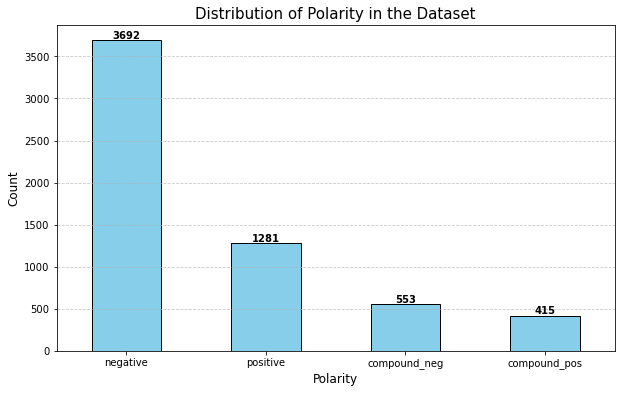

Dataset Description:


,Egyptian,MSA
count,5941.000000,5941.000000
mean,0.448578,0.551422
std,0.497391,0.497391
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000



Number of Rows in the Dataset: 5941

Number of Positive, Negative, Compound_Pos, and Compound_Neg in the Polarity column:


negative        3692
positive        1281
compound_neg     553
compound_pos     415
Name: Polarity, dtype: int64


Percentage of Each Polarity:


negative        62.144420
positive        21.562027
compound_neg     9.308197
compound_pos     6.985356
Name: Polarity, dtype: float64

In [10]:
# Calculate the total number of rows
total_rows = len(df)

# Count the occurrences of each type of polarity in the Polarity column
polarity_counts = df['Polarity'].value_counts()

# Generate descriptive statistics for numerical columns
descriptive_stats = df.describe()

# Plotting
plt.figure(figsize=(10, 6))
polarity_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Polarity in the Dataset', fontsize=15)
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
for index, value in enumerate(polarity_counts):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize=10, fontweight='bold')
plt.show()

# Calculate the percentage of each type of polarity in the dataset
polarity_percentages = (polarity_counts / total_rows) * 100

# Display the dataset description, number of rows, and polarity counts
print("Dataset Description:")
display(descriptive_stats)

print(f"\nNumber of Rows in the Dataset: {total_rows}")

print("\nNumber of Positive, Negative, Compound_Pos, and Compound_Neg in the Polarity column:")
display(polarity_counts)

print("\nPercentage of Each Polarity:")
display(polarity_percentages)

# Convert Lexioms to LeetSpeak

In [11]:
# Define dictionaries for Arabic to leetspeak conversion and back
arabic_to_leetspeak = {
    'ا': '2', 'ب': 'b', 'ت': 't', 'ث': 'th', 'ج': 'j', 'ح': '7', 'خ': 'kh',
    'د': 'd', 'ذ': 'dh', 'ر': 'r', 'ز': 'z', 'س': 's', 'ش': 'sh', 'ص': '9',
    'ض': '9d', 'ط': '6', 'ظ': '6dh', 'ع': '3', 'غ': '3\'', 'ف': 'f', 'ق': '8',
    'ك': 'k', 'ل': 'l', 'م': 'm', 'ن': 'n', 'ه': 'h', 'و': 'w', 'ي': 'y'
}

leetspeak_to_arabic = {v: k for k, v in arabic_to_leetspeak.items()}

# Function to convert Arabic text to leetspeak
def arabic_to_l33tspeak(text):
    return ''.join(arabic_to_leetspeak.get(char, char) for char in text)

# Function to convert leetspeak back to Arabic text
def l33tspeak_to_arabic(text):
    for k, v in leetspeak_to_arabic.items():
        text = text.replace(k, v)
    return text

# Tokenization function
def tokenize(text):
    return text.split()

# Read the Excel file into a DataFrame
input_file = 'NileULex_v0.27.xlsx'
df = pd.read_excel(input_file, skiprows=10, names=['Term', 'Polarity', 'Egyptian', 'MSA'])

# Apply conversions and tokenization to the 'Term' column
df['Term_leetspeak'] = df['Term'].apply(arabic_to_l33tspeak)
df['Term_back'] = df['Term_leetspeak'].apply(l33tspeak_to_arabic)
df['Tokens_leetspeak'] = df['Term_leetspeak'].apply(tokenize)
df['Tokens_back'] = df['Term_back'].apply(tokenize)

# Save the DataFrame with new columns to a new Excel file
output_file = 'processed_lexioms.xlsx'
df.to_excel(output_file, index=False)

# Displaying the DataFrame for verification
display(df)

,Term,Polarity,Egyptian,MSA,Term_leetspeak,Term_back,Tokens_leetspeak,Tokens_back
0,اتقي الله,compound_neg,0,1,2t8y 2llh,اتقي الله,"[2t8y, 2llh]","[اتقي, الله]"
1,اتقي شر,compound_neg,0,1,2t8y shr,اتقي سهر,"[2t8y, shr]","[اتقي, سهر]"
2,اتكسف علي دمك,compound_neg,1,0,2tksf 3ly dmk,اتكسف علي دمك,"[2tksf, 3ly, dmk]","[اتكسف, علي, دمك]"
3,اتكسفوا علي دمكم,compound_neg,1,0,2tksfw2 3ly dmkm,اتكسفوا علي دمكم,"[2tksfw2, 3ly, dmkm]","[اتكسفوا, علي, دمكم]"
4,اتمسح بينا الأرض,compound_neg,1,0,2tms7 byn2 2lأr9d,اتمسح بينا الأرصد,"[2tms7, byn2, 2lأr9d]","[اتمسح, بينا, الأرصد]"
...,...,...,...,...,...,...,...,...
5938,يؤمن,positive,0,1,yؤmn,يؤمن,[yؤmn],[يؤمن]
5939,يؤنس,positive,0,1,yؤns,يؤنس,[yؤns],[يؤنس]
5940,يؤنسني,positive,0,1,yؤnsny,يؤنسني,[yؤnsny],[يؤنسني]
5941,يؤيد,positive,0,1,yؤyd,يؤيد,[yؤyd],[يؤيد]


# Model Loading and Training

# Knowledge Distillation:

In [12]:
from sklearn.model_selection import train_test_split

# Load the processed dataset
df = pd.read_excel('processed_lexioms.xlsx')

# Display the first few rows of the dataset
display(df.head())

# For demonstration purposes, let's assume 'Term' is the feature and 'Polarity' is the target
X = df['Term']
y = df['Polarity']

# Encode the target labels
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets for the teacher model
X_train_teacher, X_test_teacher, y_train_teacher, y_test_teacher = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Split the data into training and testing sets for the student model
X_train_student, X_test_student, y_train_student, y_test_student = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Display the sizes of the splits
print("Teacher Training Set Size:", X_train_teacher.shape[0])
print("Teacher Testing Set Size:", X_test_teacher.shape[0])
print("Student Training Set Size:", X_train_student.shape[0])
print("Student Testing Set Size:", X_test_student.shape[0])

,Term,Polarity,Egyptian,MSA,Term_leetspeak,Term_back,Tokens_leetspeak,Tokens_back
0,اتقي الله,compound_neg,0,1,2t8y 2llh,اتقي الله,"['2t8y', '2llh']","['اتقي', 'الله']"
1,اتقي شر,compound_neg,0,1,2t8y shr,اتقي سهر,"['2t8y', 'shr']","['اتقي', 'سهر']"
2,اتكسف علي دمك,compound_neg,1,0,2tksf 3ly dmk,اتكسف علي دمك,"['2tksf', '3ly', 'dmk']","['اتكسف', 'علي', 'دمك']"
3,اتكسفوا علي دمكم,compound_neg,1,0,2tksfw2 3ly dmkm,اتكسفوا علي دمكم,"['2tksfw2', '3ly', 'dmkm']","['اتكسفوا', 'علي', 'دمكم']"
4,اتمسح بينا الأرض,compound_neg,1,0,2tms7 byn2 2lأr9d,اتمسح بينا الأرصد,"['2tms7', 'byn2', '2lأr9d']","['اتمسح', 'بينا', 'الأرصد']"


Teacher Training Set Size: 4754
Teacher Testing Set Size: 1189
Student Training Set Size: 4754
Student Testing Set Size: 1189


# Text Vectorization

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Initialize the TF-IDF Vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the training data for the teacher model
X_train_teacher_tfidf = vectorizer.fit_transform(X_train_teacher)
X_test_teacher_tfidf = vectorizer.transform(X_test_teacher)

# Fit and transform the training data for the student model
X_train_student_tfidf = vectorizer.fit_transform(X_train_student)
X_test_student_tfidf = vectorizer.transform(X_test_student)

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from transformers import AutoTokenizer, DistilBertTokenizer

# Read the processed dataset
input_file = 'processed_lexioms.xlsx'
df = pd.read_excel(input_file)

# Let's assume 'Term' is the feature and 'Polarity' is the target
X = df['Term']
y = df['Polarity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display a sample of each dataset
print("Sample of Teacher Train Dataset:")
print(X_train)
print(y_train)

print("\nSample of Teacher Test Dataset:")
print(X_test.head())
print(y_test.head())

print("\nSample of Student Train Dataset:")
print(X_train.head())
print(y_train.head())

print("\nSample of Student Test Dataset:")
print(X_test.head())
print(y_test.head())

# Initialize the tokenizer for both teacher and student models
#token = "<Your_API>"
#teacher_tokenizer = AutoTokenizer.from_pretrained("allenai/command-r-plus", revision="main", use_auth_token=token)
#student_tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')


Sample of Teacher Train Dataset:
2629           سفاله
1840           تخريف
2498            رشاش
5434           كفاءه
2698             شرس
            ...     
3772           نتخرس
5191          ررووعه
5226           سعاده
5390             فرح
860     ليس لها مثيل
Name: Term, Length: 4754, dtype: object
2629        negative
1840        negative
2498        negative
5434        positive
2698        negative
            ...     
3772        negative
5191        positive
5226        positive
5390        positive
860     compound_pos
Name: Polarity, Length: 4754, dtype: object

Sample of Teacher Test Dataset:
4767    الانسجام
2131       تنتحل
1400        انيل
5184       رائعه
2827         طغي
Name: Term, dtype: object
4767    positive
2131    negative
1400    negative
5184    positive
2827    negative
Name: Polarity, dtype: object

Sample of Student Train Dataset:
2629    سفاله
1840    تخريف
2498     رشاش
5434    كفاءه
2698      شرس
Name: Term, dtype: object
2629    negative
1840    negativ

# Command R+

In [22]:
import torch
import pytorch_lightning as pl
from transformers import AutoModelForSequenceClassification, DistilBertForSequenceClassification
from huggingface_hub import hf_hub_url

# Load datasets from the first part
from first_part_code import train_dataset_teacher, test_dataset_teacher, train_dataset_student, test_dataset_student

# Initialize LightningModule for both models
teacher_model = LexiomModel(teacher_model, teacher_tokenizer)
student_model = LexiomModel(student_model, student_tokenizer)

# Train both models
trainer = pl.Trainer(max_epochs=3, gpus=1, progress_bar_refresh_rate=10)
trainer.fit([teacher_model, student_model], [train_dataset_teacher, train_dataset_student], [test_dataset_teacher, test_dataset_student])

# Evaluate both models
result_teacher = trainer.test(teacher_model, test_dataloaders=test_dataset_teacher)
result_student = trainer.test(student_model, test_dataloaders=test_dataset_student)

# Display performance metrics for both models
print("Performance Metrics for Teacher Model:")
display(pd.DataFrame(result_teacher).transpose())

print("\nPerformance Metrics for Student Model:")
display(pd.DataFrame(result_student).transpose())


C:\Users\m7mds\anaconda3\lib\site-packages\transformers\models\auto\tokenization_auto.py:757: FutureWarning: The `use_auth_token` argument is deprecated and will be removed in v5 of Transformers. Please use `token` instead.
  


OSError: allenai/command-r-plus is not a local folder and is not a valid model identifier listed on 'https://huggingface.co/models'
If this is a private repository, make sure to pass a token having permission to this repo either by logging in with `huggingface-cli login` or by passing `token=<your_token>`